## Location Selection for A New Restaurant in San Francisco, CA

#### Hongyu Chen, Aug 2020

### 1. Business Problem and Background 

I have been wanting to open a restaurant of my own for a long time. In this Capstone project I will try to use the knowledge we have learned about data analysis and FourSquare neighborhood exploring to tentatively find some potential locations in San Francisco, CA to open my restaurant (where I currently live and work).

San Francisco, as one of the biggest and most immigration-friendly cities in the United States, has a great diversity in everything, including restaurants, which brings a great challenge for any new restaurant to succeed, or survive. According to online sourse, there are more than 4400 restaurants in San Francisco [1], and how to stand out from the peers will be a brain-storming step before I make any decision and investment. There are two main factors I have in mind in the first place that will be strong determinants, **1) location and 2) cuisine type**

#### Location
Location is definitely the **KEY**: population, number of restaurant, relative number of restaurant per capita, safe places, ethinicity composition, all of these will be dependent on location

#### Cuisine type
Cuisine type to me is not as critical as location: if you have a solid basis of potential customer, and your food is tasty, service is excellent, decoration is warm, then any type of food could be a hit. But it is definitely helpful to learn how many competitors you will have after all, and I could make my decision at the least risk. 
There is pretty interative data visualization inidicating the most common cuisine in SF neighborhood include **Mexican, Chinese, and Americna (Burger)** [2], should I follow this trend? Or should I aovide the competition. 
Moreover, I am Chinese, so Chinese cuisine is the one that I know the most. However, I love all types of food from anywhere around the world, so that might not be a big deal

One thing to point out is these two factors are actually inter-connected: for example what type of cuisine you decide to work on will not only rely on the current number of competitors in the neighborhood, but also population, especially ethinicity composition of this neighborhood.

### In this project, I will analyze both factors, mainly focusing on location, and the final delivery is expected to be the answer of "Where to do business, and what type"

### 2. Dataset and strategies
Neighborhood information and latitude/longitude information will be needed to explore venues on FourSquare and for data visualization
Three datasets will be used to perform this initial analysis:
1. Zipcode and neighborhood of SF
2. Meta data of zip code and coordinates
3. SF population of each neighborhood (and Chinese % maybe used if I open a Chinese restaurant)

The method for this study has the following steps:
1. Combine above 3 datasets to have a 'meta' data (*df_SFdata*) containing neighborhood, location, population and more
2. Use **FourSquare API** to search for nearby venues of each neighborhood, according to their latitude and langitude 
3. Pre-process the venues dataset to select only dining places by each neighborhood (*SF_dine*)
4. Combine the df_SFdata and SF_dine, and **normalize number of venues by total population** of corresponding neighborhood
5. Calculate frequency of appearance of all dining places after normalization, apply K-mean clustering to group them into 5 clusters
6. Analyze the cluster and make decisions on "what type of restaurant and where"

### 3. Data processing and visualization

After pre-processing the meta dataset looks like below, including SF neighborhood, zip code, coordinates and population

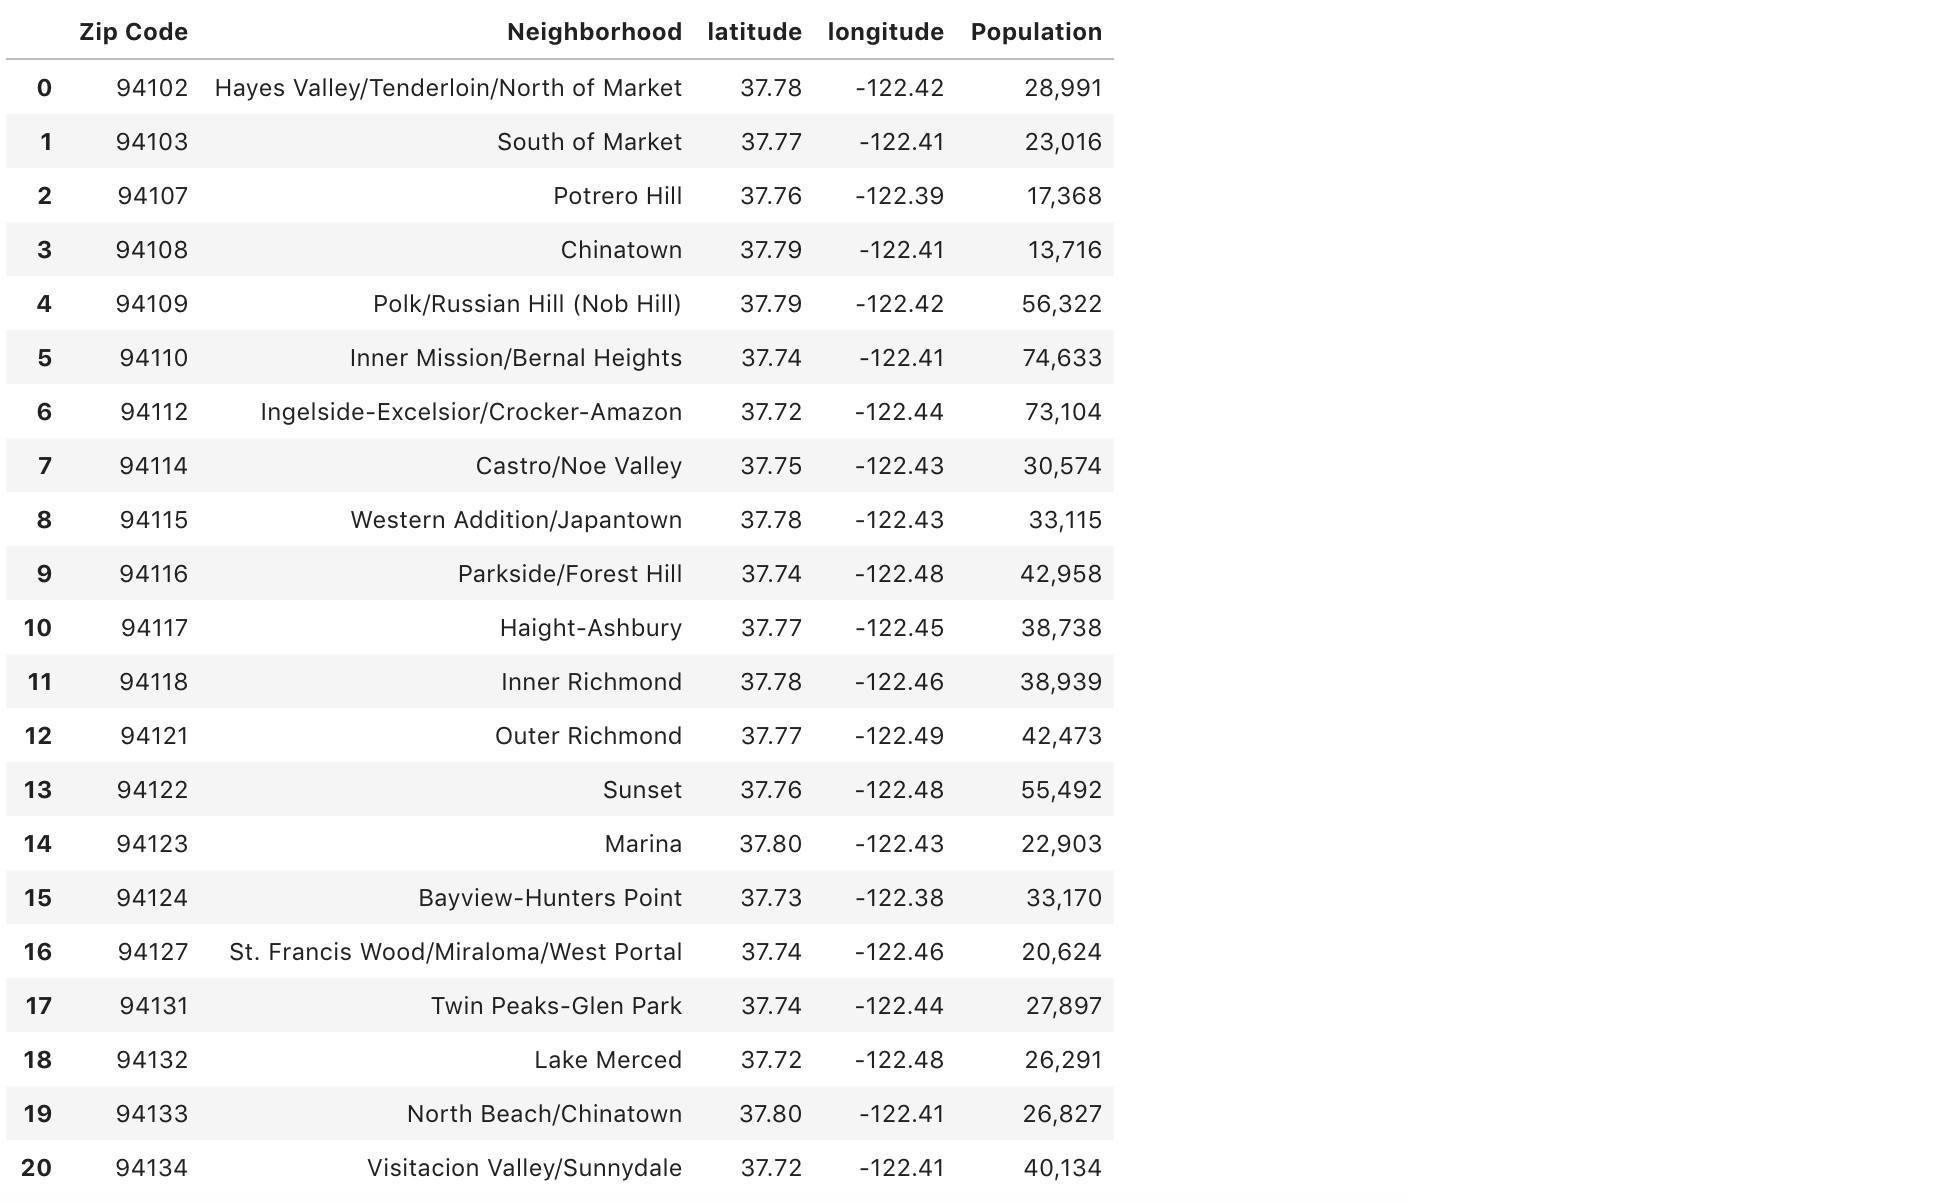

A map was made using the Folium library to visualize all neighborhoods:

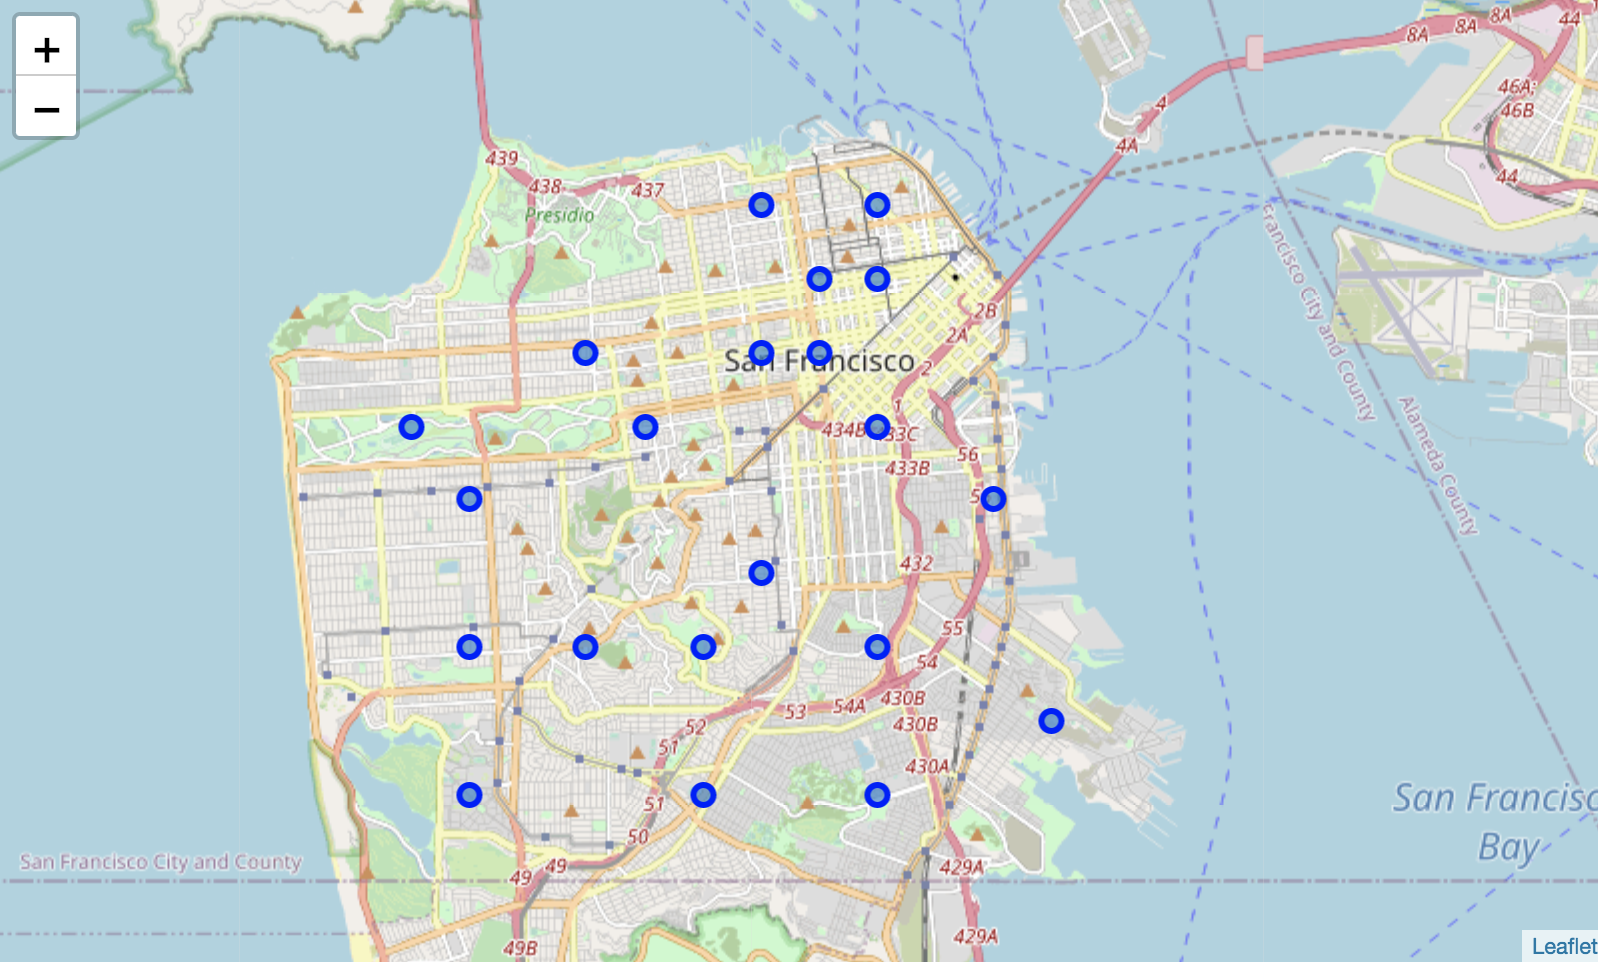

FourSquare API limit was set as 100, and radius was set as 500 m. Venues were obtained and then merge with the df_SFdata meta dataset for normalization. I would like to share the normalization code as below: it involves changing data type from string containing "," to int, and whole data division. More over, a multiplier of 10000 was set arbitrarily to avoid values are too small and appear as 0

In [ ]:
# From venues select columns indicating dining places using keywords "Restaurant","Bar", and "Food"
SF_restaurant=SF_grouped.loc[:, SF_grouped.columns.str.contains('Restaurant')]
SF_bar=SF_grouped.loc[:, SF_grouped.columns.str.contains('Bar')]
SF_food=SF_grouped.loc[:, SF_grouped.columns.str.contains('Food')]
SF_dine=pd.concat([SF_restaurant, SF_bar, SF_food], axis=1)

# Merge by 'Neighborhood'
SF_dine_percentage = SF_dine.merge(df_SFdata, on="Neighborhood", how="left")

# Change percentage string to number for normalization
SF_dine_percentage['Population']=SF_dine_percentage['Population'].replace({',':''},regex=True).apply(pd.to_numeric,1)

# Drop columns that will not be analyzed in this step
SF_dine_percentage=SF_dine_percentage.drop(['Zip Code','latitude','longitude'], 1)

# Create the normalizer data series 
divider=SF_dine_percentage['Population']

# To perform division on the entire dataframe, we need to create a temporary dataset and drop the 'Neighborhood' column to make all data numeric
temp_df=SF_dine_percentage
temp_df=temp_df.drop('Neighborhood',1)

# Appply a multiplier in case the value after normalization is too small to operate
temp_df=temp_df*10000

# Normalize dataset to the normalizer
temp_df=temp_df.divide(divider, 0)

#Add back the 'Neighborhood' column
temp_df=pd.concat([temp_df, SF_dine_percentage['Neighborhood']], axis=1)

# Move neighborhood column to the first column
fixed_columns_2 = [temp_df.columns[-1]] + list(temp_df.columns[:-1])
SF_dine_final = temp_df[fixed_columns_2]
SF_dine_final = SF_dine_final.drop(['Population'],1)
SF_dine_final.head()


The final dataset SF_dine_final looks like below (more columns there but no room to display):

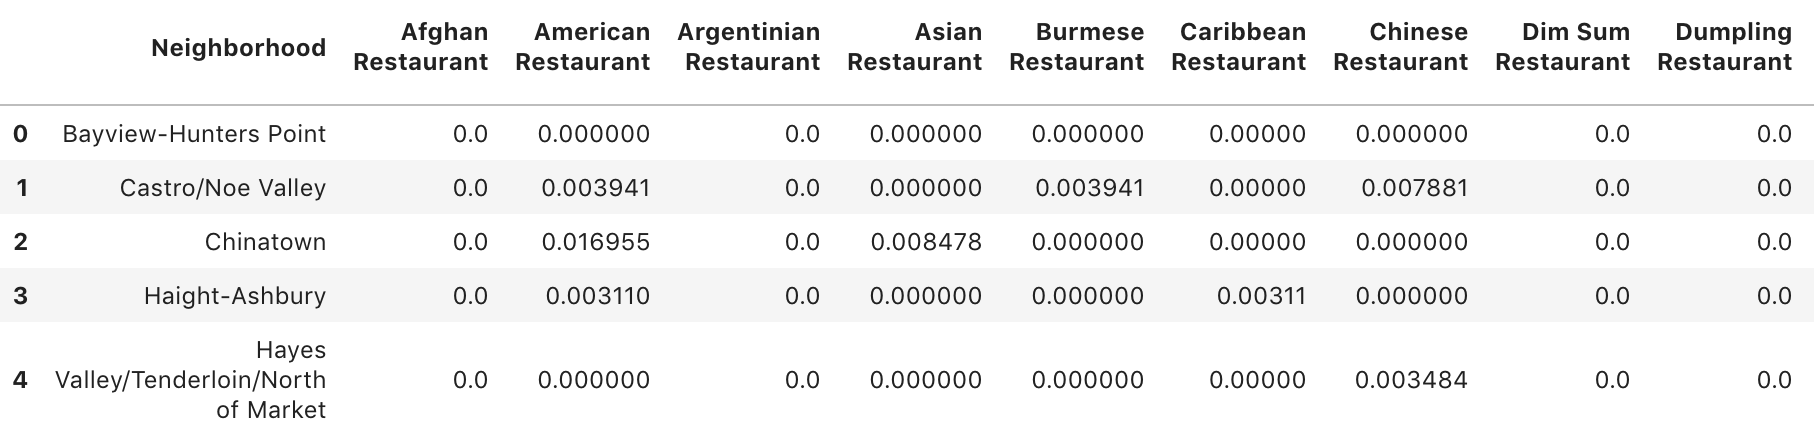

After grouping and ordering, the final dataset has all types of restaurant of each neighborhood listed in order
Below is the first 5 rows of the dataset

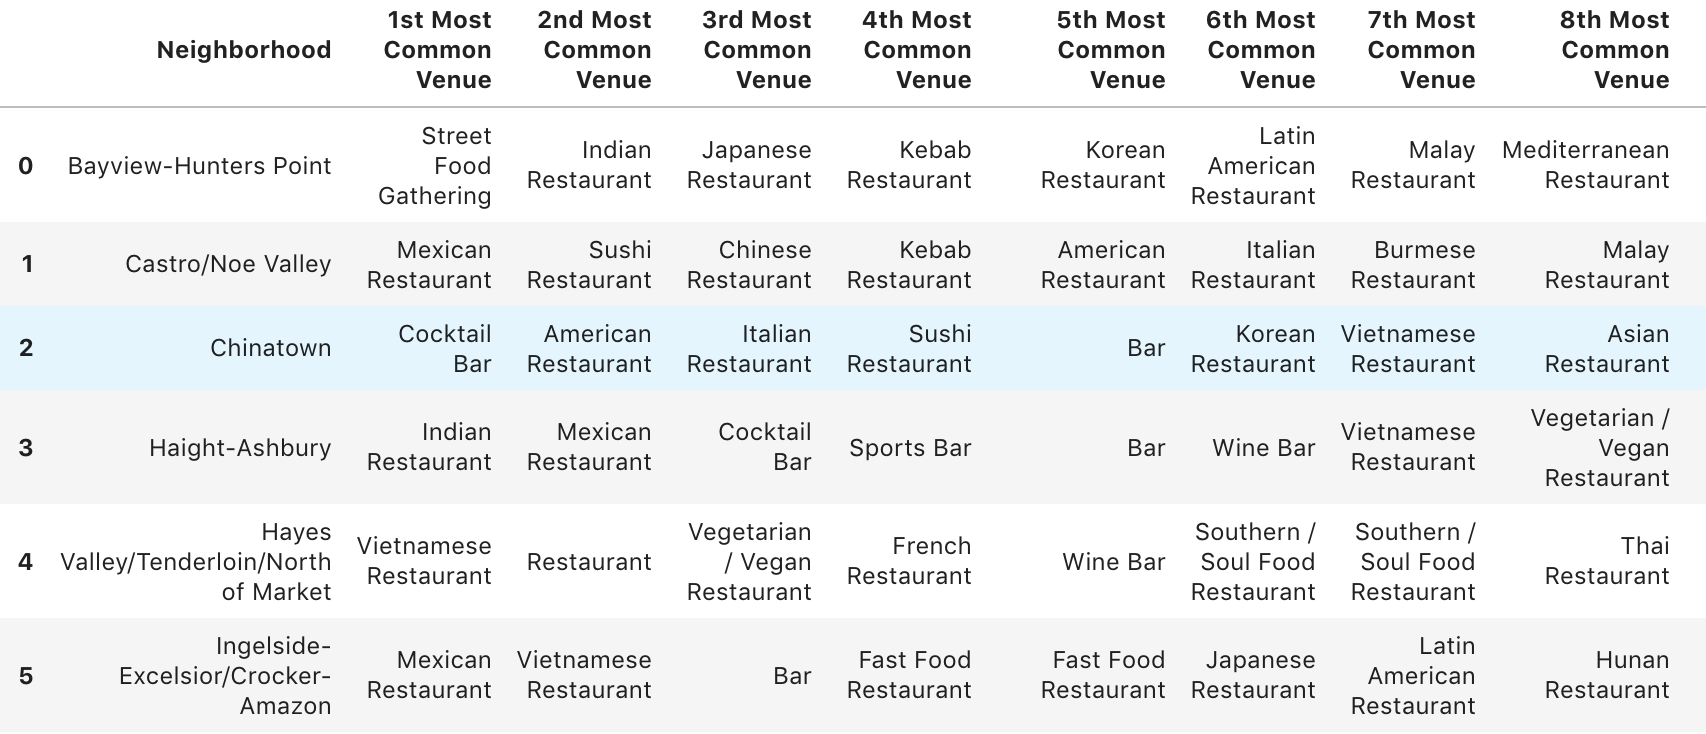

Then K-mean clustering was performed:
Number of clusters was set at 5 (as a starting point), and the clustering was performed based on the frequency of restaurant type of each neighborhood

Then Folium library was applied again, to visualize those clusters and their geographic information:

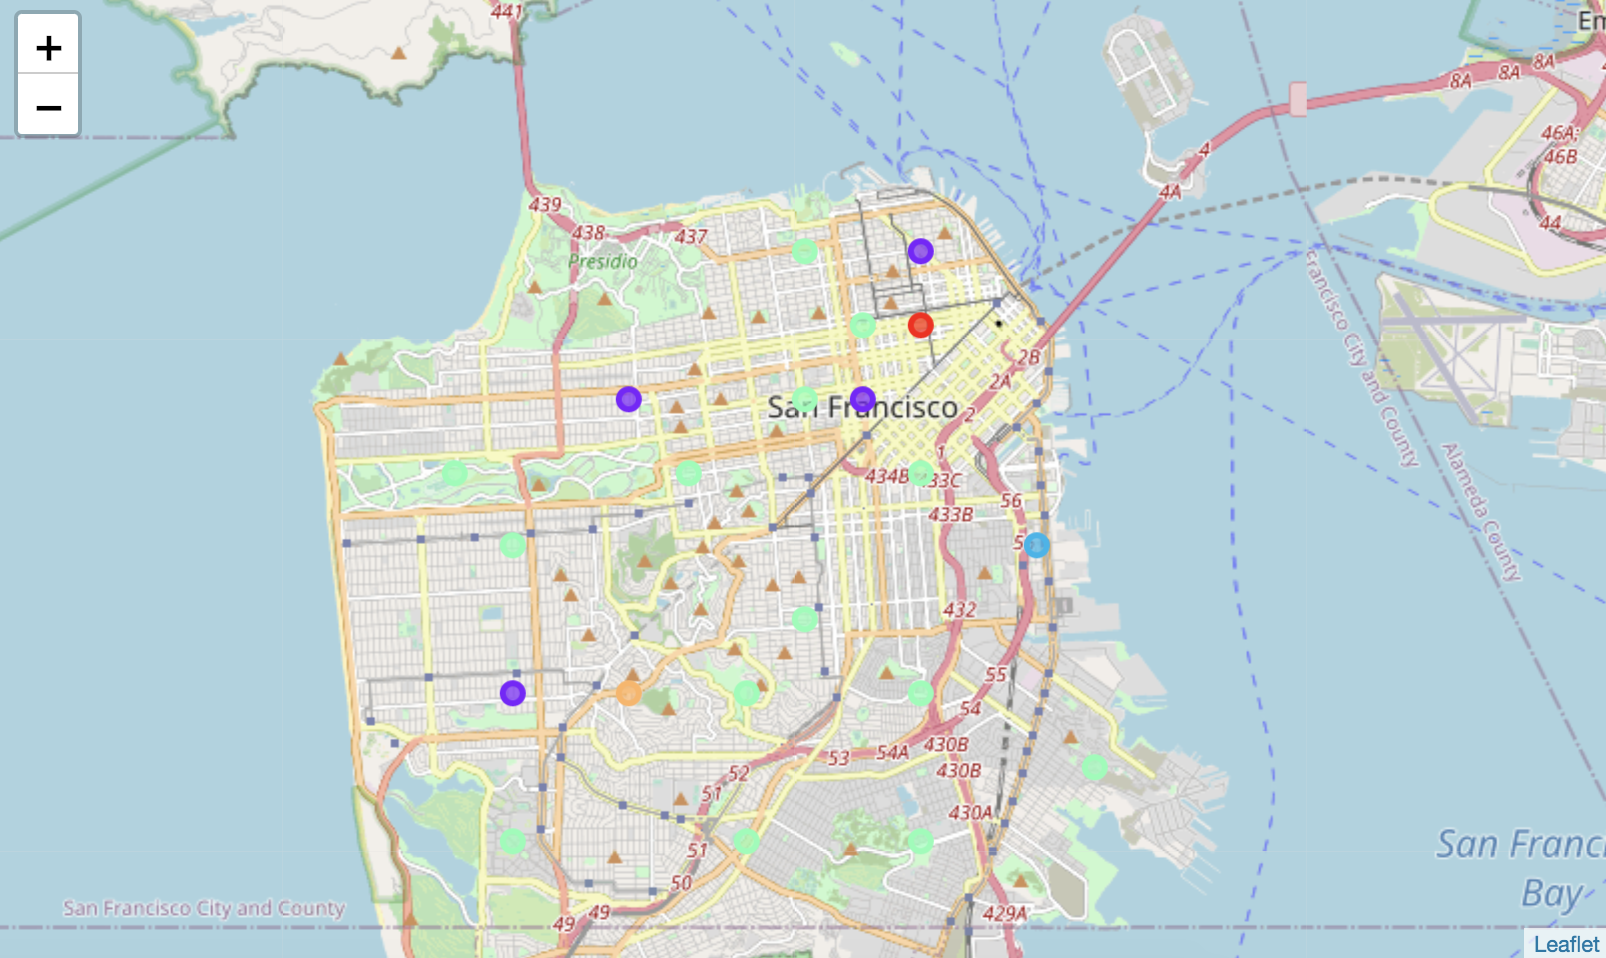

The information of 5 clusters are as below (cluster 3 is not fully displayed):

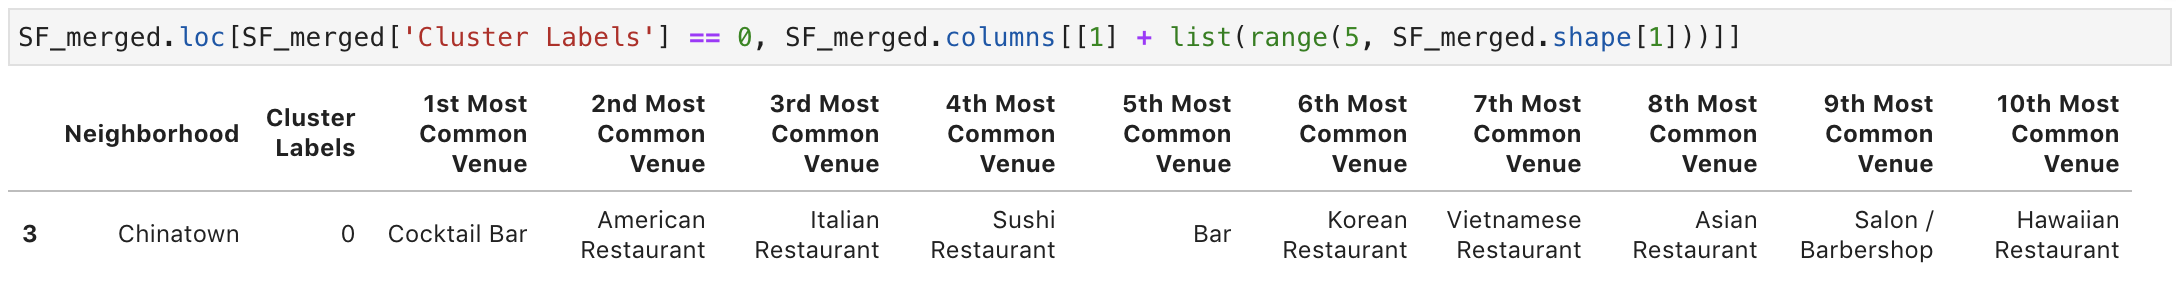
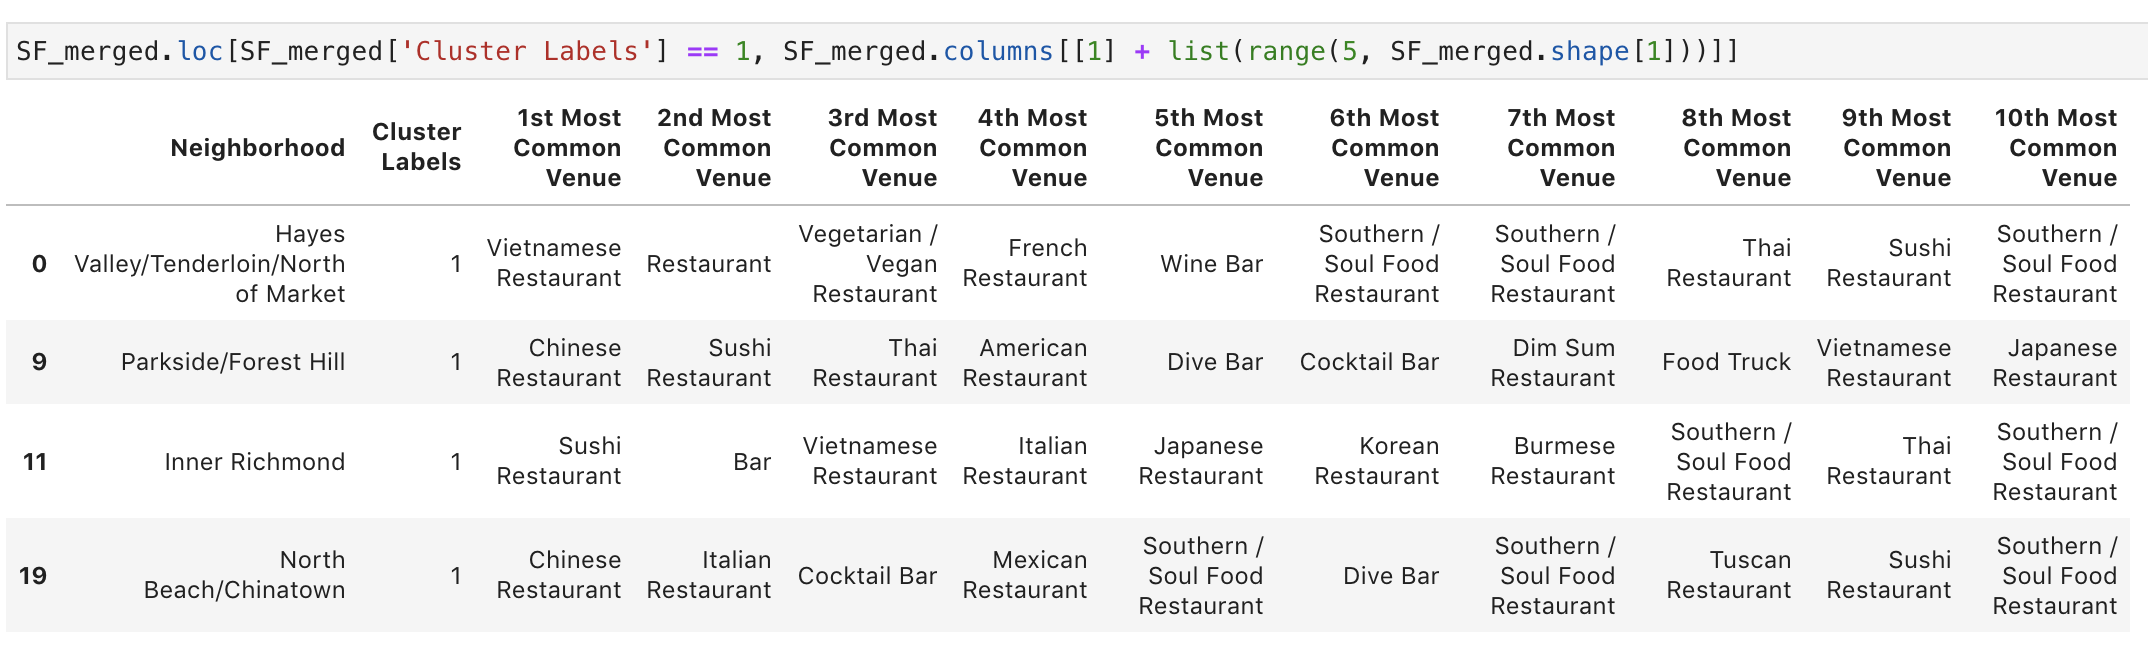
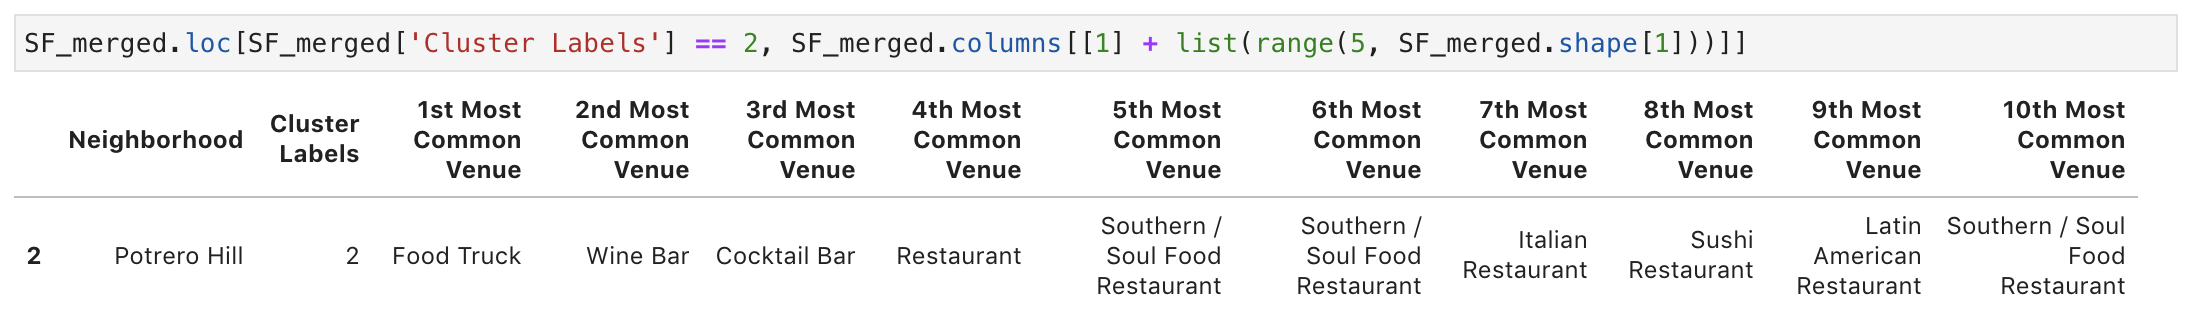
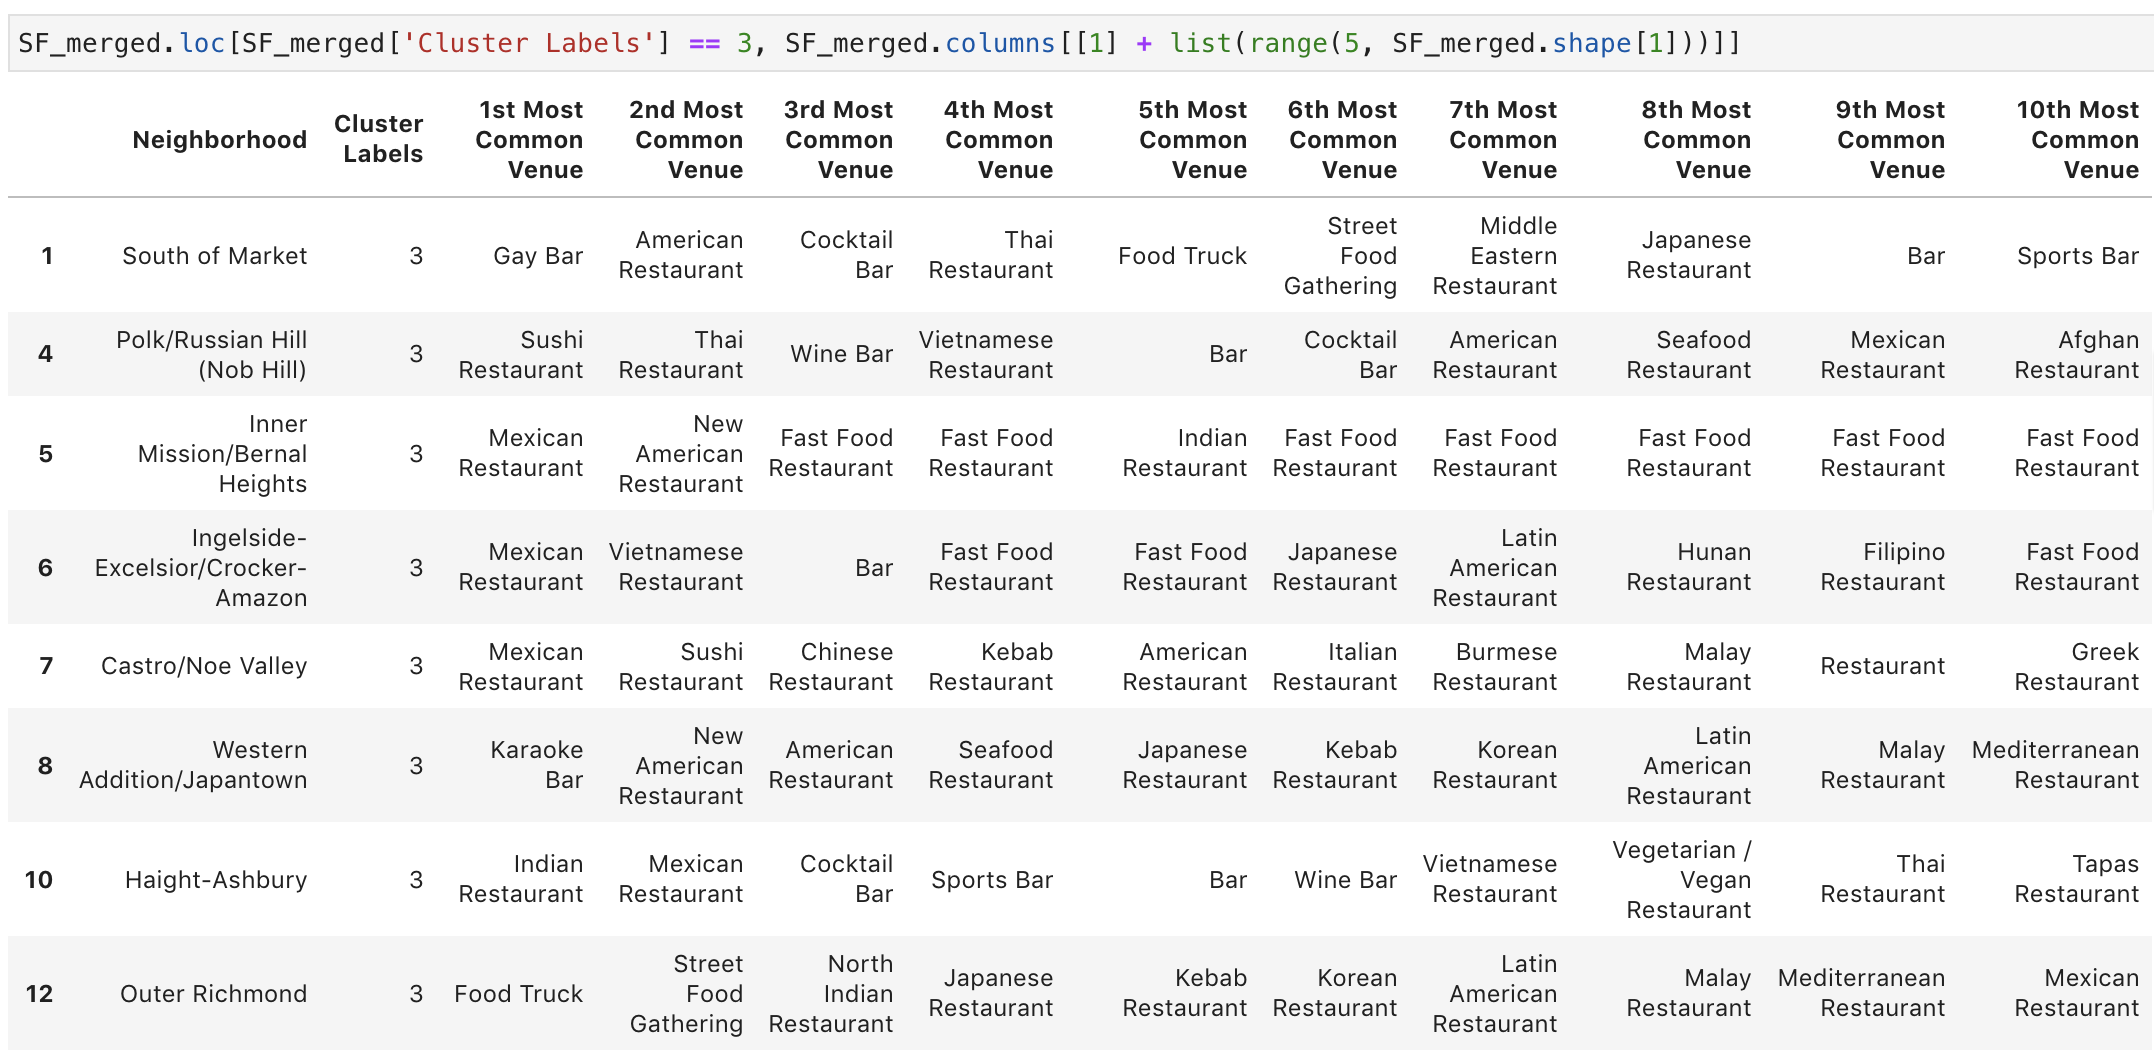
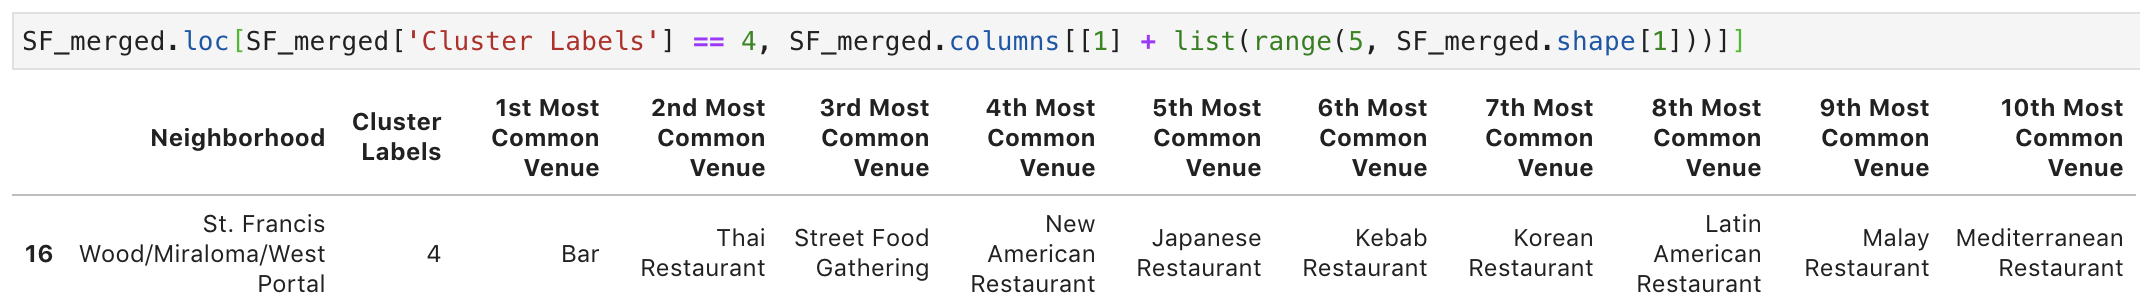

### 4. Discussion

The aim of this study is to analyze restaurant number in all neighborhood of San Francisco, CA, in order to guide the selection of location and cuisine type of a new restaurant. To achieve this goal, datasets with SF neighborhood and location information was applied for analysis, and FourSquare API was utilized to get the restaurant information of every neighborhood according to location

It is critical to include population of a neighborhood as a critical factor, because only the quantity per capita will be meaningful in guiding the relative competition as well as need of a restaurant type. Also exploring the dataset, different neighborhoods if SF have great variation in population, from as much as >55,000 (such as Polk/Russian Hill (Nob Hill), or Sunset), to as little as <20,000 (Potrero Hill, Chinatown), which highlights the importance of normalization and makes sense of our strategy. 

Through data grouping and clustering, we got 5 different clusters with similarities. Even though the algorithm does not explicitly tell us the feature of each cluster, we could still try to make our observation.
Apparently cluster 3 has the most popular cuisine type as Mexico (numbers of neighborhoods has Mexico in top 3 venues); cluster 1 is more towards Asian stype: such as Chinese, Vietnamnese or Sushi.
Other clusters just contain 1 neighborhood therefore the pattern is hard to summarize. 

**In clusion, the result has given certain level of guidance, such as it is better not to open a Mexican restaurant in neighborhoods in cluster 3 to avoid fierce competition; also as Chinese, if I plan to open a Chinese restaurant, I should avoid cluster 1**

### 5. Future work/potential pitfalls

As any study, this one also has a lot to be improved, such as following aspect:

##### 1. The accuracy and time sensitivity of data
The data used in this study was not the most up-do-date version, but based on easy accessibility. Particularly, it does not contain the effect of COVID-19 on the business of dining. According the news, more than 400 restaurants were closed during this pandemic, which is around 9% setback of this field [3].

##### 2. The data from FourSquare API and data processing strategy
If we look into the dataset of venues obtained from FourSquare API, we could find several unjustified parameter settings as well as the dataset itself: Limit=100, radius=500 are based on previous experience, and this could be modified more subtly to include more venues; also the columns of the dataset, namely the catagory names generate by FourSquare API, can be confusing: 1) several columns were not included due to uncategorized names, such as "Pizza place", "Hotdog", 2) some columns are not categorized properly: "Dim Sum", "Szechuan" can be set as "Chinese" as well; probably using differet API could improve the accuracy of analysis

##### 3. The final ordered dataset contains many "0"s 
There are many "0"s in the venue frequency, therefore after normalization and re-ordering, some neighborhoods have the same type of restaurant in different places, for example "Ingelside-Excelsior/Crocker-Amazon" neighborhood 4th and 5th are both "Fast Food Restaurant". This could be improved by further filtration and replacing "0"s with NA.

##### 4. More factors to be considered
Other factors such as rent, safety, transportation, all should be considered.


Even though this study is not fully solve the problem, I still have learned so much and actually enjoyed the power of Data Science! I believe this is an excellent starting point to guide me to this field, and I will keep learning and applying what I have learned to my daily life and work!
For any questions and discussion please reach out to me without hesitation (Hongyu, hc502@aol.com)

Thank you!!

Reference

1. https://pos.toasttab.com/blog/on-the-line/number-of-restaurants-in-san-francisco-shrinking
2. https://www.sfgate.com/food/article/The-most-popular-type-of-food-in-sf-12540885.php
3. https://www.nbcbayarea.com/news/local/san-francisco/more-than-400-san-francisco-restaurants-close-in-2019-report/2208296/